In [0]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
from sklearn.decomposition import TruncatedSVD
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import *
from termcolor import colored

In [0]:
df = pd.read_csv('ecommerce_sample_dataset.csv') # Reading the file

In [8]:
df.isnull().sum() # Checking Null values

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

# Missing Values

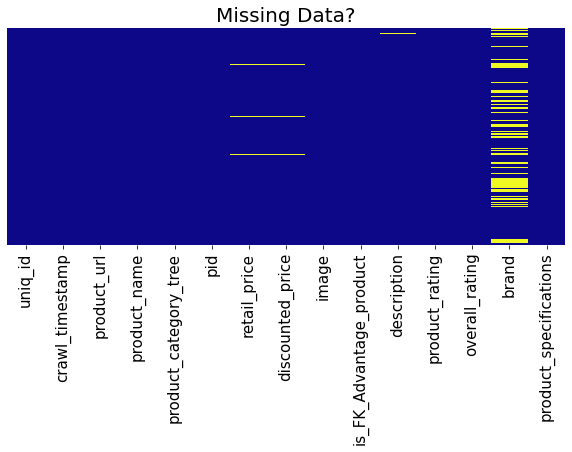

In [9]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),
            cmap='plasma',
            yticklabels=False,
            cbar=False)
plt.title('Missing Data?',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

In [10]:
x = 0
for y in df['product_rating']:
  if y=='No rating available':
    x=x+1
print(x)

18151


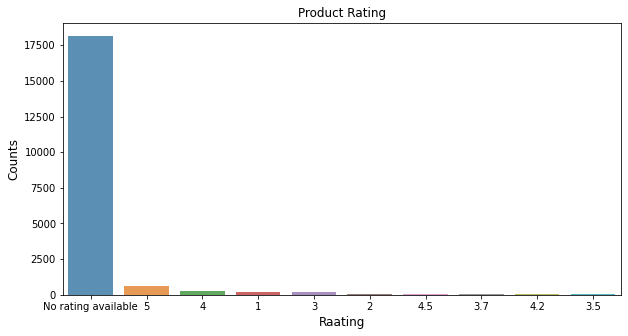

In [11]:
rating_count = df['product_rating'].value_counts()
rating_count = rating_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(rating_count.index, rating_count.values, alpha=0.8)
plt.title('Product Rating')
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Raating', fontsize=12)
plt.show()

## Preprocessing

In [0]:
df['disct_percentage']=(df['retail_price']-df['discounted_price'])/df['retail_price']
df['disct_percentage']=np.round(df['disct_percentage'],2)

# Cleaning

In [0]:
df['product_category_tree'] = df['product_category_tree'].str.replace(r';|\[|\]|\,|\(|\'|\"|\)|\.', '')
df['product_category_tree'] = df['product_category_tree'].str.replace(r'\d+', '')
df['product_category_tree'] = df['product_category_tree'].str.replace(' ', '')
df['product_category_tree'] = df['product_category_tree'].str.replace('>', ' ')

In [0]:
df['product_rating']=df['product_rating'].replace('No rating available',np.NaN) # Replacing No rating available with NaN
s = df["product_rating"].astype(float).mean() # Calculating the mean of all the given rating
df["product_rating"] = df["product_rating"].astype(float).subtract(s)
df['product_rating'] = df['product_rating'].fillna(0)
df['disct_percentage'] = df['disct_percentage'].fillna(0)        # Replacing NaN values with 0s

In [0]:
df.drop(["uniq_id", "crawl_timestamp" , "product_url" ,"description","brand","product_specifications" , "image" , "pid" , "overall_rating","retail_price" , "discounted_price" ,"is_FK_Advantage_product", "product_specifications"] ,axis=1,inplace = True) # Dropping unwawnted columns 

##How Data looks after Cleaning

In [16]:
df

,product_name,product_category_tree,product_rating,disct_percentage
0,Alisha Solid Women's Cycling Shorts,Clothing WomensClothing LingerieSleep&Swimwe...,0.0,0.62
1,FabHomeDecor Fabric Double Sofa Bed,Furniture LivingRoomFurniture SofaBeds&Futon...,0.0,0.30
2,AW Bellies,Footwear WomensFootwear Ballerinas AWBellies,0.0,0.50
3,Alisha Solid Women's Cycling Shorts,Clothing WomensClothing LingerieSleep&Swimwe...,0.0,0.62
4,Sicons All Purpose Arnica Dog Shampoo,PetSupplies Grooming Skin&CoatCare Shampoo ...,0.0,0.05
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,BabyCare Baby&KidsGifts Stickers WallDesign...,0.0,0.51
19996,Wallmantra Large Vinyl Stickers Sticker,BabyCare Baby&KidsGifts Stickers Wallmantra...,0.0,0.20
19997,Elite Collection Medium Acrylic Sticker,BabyCare Baby&KidsGifts Stickers EliteColle...,0.0,0.23
19998,Elite Collection Medium Acrylic Sticker,BabyCare Baby&KidsGifts Stickers EliteColle...,0.0,0.20


**Testing DataFrame**


In [17]:
d = {'product_category_tree' :['Jewellery BanglesBracelets&Armlets Bracelets TajPearlAlloyCuf','Watches WristWatches FranckBellaWristWatches','Clothing WomensClothing WesternWear Dresses&Skirts Dresses HugoChavezDresses','Furniture PetFurniture','HomeDecor&FestiveNeeds Showpieces ExoticIndiaShowpieces'] , 'product_rating' :['0.0' , '-0.207085','1.42','0.0','0.0'],'disct_percentage' : ['0.40', '0.50','0.6968','0.2004','0.032']}
testing = pd.DataFrame(data = d)
testing

,product_category_tree,product_rating,disct_percentage
0,Jewellery BanglesBracelets&Armlets Bracelets T...,0.0,0.40
1,Watches WristWatches FranckBellaWristWatches,-0.207085,0.50
2,Clothing WomensClothing WesternWear Dresses&Sk...,1.42,0.6968
3,Furniture PetFurniture,0.0,0.2004
4,HomeDecor&FestiveNeeds Showpieces ExoticIndiaS...,0.0,0.032


**Converting Text to Vectors using Tf-Idf**

In [0]:
vec = TfidfVectorizer(strip_accents='unicode',
               stop_words= 'english' )

In [0]:
df1 = vec.fit_transform(df['product_category_tree']) # Fitting the tf-idf and then transform to vectors, Output is an array
data1 = pd.DataFrame(df1.toarray(), columns=vec.get_feature_names()) # Converting array to DataFrame
rest = df.drop(["product_name" , "product_category_tree"] , axis = 1)
data2 = pd.concat([data1,rest] , axis=1) # Concatinate text vector , Rating and Discount columns

In [0]:
svd = TruncatedSVD(n_components=9) # Dimension Reduction
data3 = svd.fit_transform(data2)
data = pd.DataFrame(data3)

**Cosine Similarity**


1.   Cosine similarity is used as our 'y', because in our Dataset around 18.5k rating were NaN so we cannot use Collaborative Item-Item Filtering




In [0]:
sim = cosine_similarity(data, data)
l = list(df["product_name"])
df_sim = pd.DataFrame(sim, columns=l)
df_sim = df_sim.loc[:,~df_sim.columns.duplicated()]  # Removing Duplicate Columns

# Top 6 predictions of our testing DataFrame


1.   zz1 stores the top 6 predictions of First Row of Testing DataFrame
2.   Similarly zz2 , zz3 and zz4



In [22]:
zz = df_sim.iloc[326]
zz1 = zz.sort_values(ascending=False)[:6]
zz1

Taj Pearl Alloy Cuff                     1.000000
Jewel Touch Alloy, Resin Bracelet Set    0.999998
Jewelizer Alloy Bracelet                 0.999998
Nirosha Alloy Bracelet Set               0.999998
DCA Brass Copper Bracelet                0.999998
MKB Fabric Bangle                        0.999956
Name: 326, dtype: float64

In [23]:
zz = df_sim.iloc[144]
zz2 = zz.sort_values(ascending=False)[:6]
zz2

Franck Bella FB0122DD Analog Watch  - For Men, Boys        1.000000
Franck Bella FB123D Analog Watch  - For Men, Boys          1.000000
Franck Bella FB0128B Analog Watch  - For Men, Boys         1.000000
Franck Bella FB127A Analog Watch  - For Boys, Men          1.000000
Kool Kidz DMK-007-BL 01 Analog Watch  - For Boys, Girls    0.999997
Tenda TE-PW201A                                            0.999986
Name: 144, dtype: float64

In [24]:
zz = df_sim.iloc[393]
zz3 = zz.sort_values(ascending=False)[:6]
zz3

Ausy Casual Short Sleeve Floral Print Women's Top    1.000000
Ausy Casual Short Sleeve Printed Women's Top         1.000000
MERIL Casual Full Sleeve Printed Women's Top         0.999997
Bebo Casual Full Sleeve Solid Women's Top            0.999996
Klick2Style Casual Sleeveless Solid Women's Top      0.999996
Albely Casual Short Sleeve Solid Women's Top         0.999996
Name: 393, dtype: float64

In [25]:
zz = df_sim.iloc[16155]
zz4 = zz.sort_values(ascending=False)[:6]
zz4

Jerry's Jppb11563 L Pet Bed     1.0
Jerry's Jppb11584 XL Pet Bed    1.0
Jerry's Jppb11562 M Pet Bed     1.0
Jerry's Jppb11591 S Pet Bed     1.0
Jerry's Jppb11552 M Pet Bed     1.0
Pet Club51 PC278 M Pet Bed      1.0
Name: 16155, dtype: float64

In [26]:
zz = df_sim.iloc[1566]
zz5 = zz.sort_values(ascending=False)[:6]
zz5

Exotic India Vaishnava Symbols - Shankha And Chakra Showpiece  -  37 cm       1.000000
Exotic India Adi Buddha Vajrasattva Showpiece  -  27.94 cm                    1.000000
Exotic India Relaxing Ganesha Showpiece  -  11.43 cm                          1.000000
Total Furnishing Jaipuri Handmade Painted Tray Showpiece  -  6 cm             0.999954
Creativity Centre Ganesha Idol Doorhanging Wallhanging Showpiece  -  28 cm    0.999621
Hawkins Stainless Steel 10 L Pressure Cooker                                  0.998728
Name: 1566, dtype: float64

# Preprocessing on our testing DataFrame

In [0]:
test = vec.transform(testing['product_category_tree'])
df_test = pd.DataFrame(test.toarray())
testing_set = testing.drop(["product_category_tree"] , axis = 1)
df1 = pd.concat([df_test,testing_set] , axis=1)

In [0]:
df2 = svd.transform(df1)
testp = pd.DataFrame(df2)

**Use of knn model and prediciting top 5 movie recommendation using Cosine Similarity as our y**

*   As it is a Multi- Label Problem so we'll loop through each Column of y and find corresponding prediction
*   Then taking out top 6 recommendations
*   Finding RMSE values



In [0]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
nn = []
mm = []
pp = []
oo = []
ll = []
for c in df_sim.columns:
    model.fit(data, df_sim[c])  #fit the model
    l = model.predict(testp)
    nn.append(l[0])
    mm.append(l[1])
    pp.append(l[2])
    oo.append(l[3])
    ll.append(l[4])

In [0]:
nn = list(enumerate(nn))
mm = list(enumerate(mm))
pp = list(enumerate(pp))
oo = list(enumerate(oo))
ll = list(enumerate(ll))

In [31]:
nn = sorted(nn, key=lambda x:x[1] , reverse=True)
predicted = []
predicted1 = []
i=0
for ii,kk in nn:
    print(df_sim.columns[ii] , kk)
    predicted.append(df_sim.columns[ii])
    predicted1.append(kk) 
    i = i+1
    if i==6:
        break
actual = []
for i in zz1:
  actual.append(i)
mse = mean_squared_error(actual,predicted1)
rmse = sqrt(mse)
print('\n')
print("The RMSE value of the 1st row is {}".format(rmse))
actual_data = pd.Series(zz1.index , name = "Actual")
predicted_data = pd.Series(predicted , name = "Predicted")
comparison = pd.DataFrame([actual_data,predicted_data] )
comparison

Waama Jewels Metal Cubic Zirconia Yellow Gold Bracelet 0.9999859700440478
Rubera Alloy Cubic Zirconia Bracelet 0.999971940088095
Voylla Alloy Cubic Zirconia Yellow Gold Kada 0.9996843271409869
Homeshopeez Metal Bracelet 0.9996843271409869
Kenway Retail Brass Bangle 0.9995897466037159
Shagun Trends Brass Diamond Yellow Gold Bangle Set 0.9995600643003443


The RMSE value of the 1st row is 0.0002949166594497371


,0,1,2,3,4,5
Actual,Taj Pearl Alloy Cuff,"Jewel Touch Alloy, Resin Bracelet Set",Jewelizer Alloy Bracelet,Nirosha Alloy Bracelet Set,DCA Brass Copper Bracelet,MKB Fabric Bangle
Predicted,Waama Jewels Metal Cubic Zirconia Yellow Gold ...,Rubera Alloy Cubic Zirconia Bracelet,Voylla Alloy Cubic Zirconia Yellow Gold Kada,Homeshopeez Metal Bracelet,Kenway Retail Brass Bangle,Shagun Trends Brass Diamond Yellow Gold Bangle...


In [32]:
mm = sorted(mm, key=lambda x:x[1] , reverse=True)
predicted2 = []
predicted = []
i=0
for ii,kk in mm:
    print(df_sim.columns[ii] , kk)
    predicted.append(df_sim.columns[ii])
    predicted2.append(kk) 
    i = i+1
    if i==6:
        break
actual = []
for i in zz2:
  actual.append(i)
mse = mean_squared_error(actual, predicted2)
rmse = sqrt(mse)
print('\n')
print("The RMSE value of the 2nd row is {}".format(rmse))
actual_data = pd.Series(zz2.index , name = "Actual")
predicted_data = pd.Series(predicted , name = "Predicted")
comparison = pd.DataFrame([actual_data,predicted_data] )
comparison

Asus RT-N14UHP High Power Wireless-N300 3-in-1 Router/ AP/ Range Extender 0.9963385832822945
SMC WBR14S 0.9960269601270849
TP-LINK Archer C2 AC750 Wireless Dual Band Gigabit Router 0.9954033158314438
TP-LINK TL-WA830RE 300 Mbps Wireless N Range Extender 0.9947956705184894
Avon Little Black Dress Body Each 150 ml Combo Set 0.9945911135104454
FabSeasons Fashion Fruit Art Faux Fur Pencil Boxes 0.9941415884392315


The RMSE value of the 2nd row is 0.0048440803401962815


,0,1,2,3,4,5
Actual,"Franck Bella FB0122DD Analog Watch - For Men,...","Franck Bella FB123D Analog Watch - For Men, Boys","Franck Bella FB0128B Analog Watch - For Men, ...","Franck Bella FB127A Analog Watch - For Boys, Men",Kool Kidz DMK-007-BL 01 Analog Watch - For Bo...,Tenda TE-PW201A
Predicted,Asus RT-N14UHP High Power Wireless-N300 3-in-1...,SMC WBR14S,TP-LINK Archer C2 AC750 Wireless Dual Band Gig...,TP-LINK TL-WA830RE 300 Mbps Wireless N Range E...,Avon Little Black Dress Body Each 150 ml Combo...,FabSeasons Fashion Fruit Art Faux Fur Pencil B...


In [33]:
pp = sorted(pp, key=lambda x:x[1] , reverse=True)
predicted3 = []
predicted = []
i=0
for ii,kk in pp:
    print(df_sim.columns[ii] , kk)
    predicted3.append(kk)
    predicted.append(df_sim.columns[ii]) 
    i = i+1
    if i==6:
        break
actual = []
for i in zz3:
  actual.append(i)
mse = mean_squared_error(actual, predicted3)
rmse = sqrt(mse)
print('\n')
print("The RMSE value of the 3rd row is {}".format(rmse))
actual_data = pd.Series(zz3.index , name = "Actual")
predicted_data = pd.Series(predicted , name = "Predicted")
comparison = pd.DataFrame([actual_data,predicted_data] )
comparison

maggie Women's Empire Waist Dress 0.9998600819889153
LADY STARK Women's Maxi Dress 0.9996257528402045
Hugo Chavez Women's Peplum Dress 0.9994957991522937
Kashana Fashions Women's A-line Dress 0.9992454886082953
Maggie Women's A-line Dress 0.9989646856011191
Maggie Women's Gathered Dress 0.9983368822260629


The RMSE value of the 3rd row is 0.0008933747864121483


,0,1,2,3,4,5
Actual,Ausy Casual Short Sleeve Floral Print Women's Top,Ausy Casual Short Sleeve Printed Women's Top,MERIL Casual Full Sleeve Printed Women's Top,Bebo Casual Full Sleeve Solid Women's Top,Klick2Style Casual Sleeveless Solid Women's Top,Albely Casual Short Sleeve Solid Women's Top
Predicted,maggie Women's Empire Waist Dress,LADY STARK Women's Maxi Dress,Hugo Chavez Women's Peplum Dress,Kashana Fashions Women's A-line Dress,Maggie Women's A-line Dress,Maggie Women's Gathered Dress


In [34]:
oo = sorted(oo, key=lambda x:x[1] , reverse=True)
predicted4 = []
predicted = []
i=0
for ii,kk in oo:
    print(df_sim.columns[ii] , kk)
    predicted4.append(kk) 
    predicted.append(df_sim.columns[ii])
    i = i+1
    if i==6:
        break
actual = []
for i in zz4:
  actual.append(i)
mse = mean_squared_error(actual, predicted4)
rmse = sqrt(mse)
print('\n')
print("The RMSE value of the 4th row is {}".format(rmse))
actual_data = pd.Series(zz4.index , name = "Actual")
predicted_data = pd.Series(predicted , name = "Predicted")
comparison = pd.DataFrame([actual_data,predicted_data] )
comparison

Petshop7 PS7DB0058 L Pet Bed 1.0000000000000002
Petshop7 PS7DB0031 L Pet Bed 1.0000000000000002
Bow! Wow!! ROUNDREDLALBIG L Pet Bed 1.0000000000000002
Caprese Satchel 0.9999982856189634
Stylocus Pouch Potli 0.9999946302129034
Revlon Liquid powder foundation Foundation 0.9999938460867487


The RMSE value of the 4th row is 3.344320965438501e-06


,0,1,2,3,4,5
Actual,Jerry's Jppb11563 L Pet Bed,Jerry's Jppb11584 XL Pet Bed,Jerry's Jppb11562 M Pet Bed,Jerry's Jppb11591 S Pet Bed,Jerry's Jppb11552 M Pet Bed,Pet Club51 PC278 M Pet Bed
Predicted,Petshop7 PS7DB0058 L Pet Bed,Petshop7 PS7DB0031 L Pet Bed,Bow! Wow!! ROUNDREDLALBIG L Pet Bed,Caprese Satchel,Stylocus Pouch Potli,Revlon Liquid powder foundation Foundation


In [35]:
ll = sorted(ll, key=lambda x:x[1] , reverse=True)
predicted = []
predicted5 = []
i=0
for ii,kk in ll:
    print(df_sim.columns[ii] , kk)
    predicted.append(df_sim.columns[ii])
    predicted5.append(kk) 
    i = i+1
    if i==6:
        break
actual = []
for i in zz5:
  actual.append(i)
mse = mean_squared_error(actual,predicted5)
rmse = sqrt(mse)
print('\n')
print("The RMSE value of the 1st row is {}".format(rmse))
actual_data = pd.Series(zz5.index , name = "Actual")
predicted_data = pd.Series(predicted , name = "Predicted")
comparison = pd.DataFrame([actual_data,predicted_data] )
comparison

Exotic India Adi Buddha Vajrasattva Showpiece  -  27.94 cm 1.0
Exotic India Vaishnava Symbols - Shankha And Chakra Showpiece  -  37 cm 1.0
Exotic India Relaxing Ganesha Showpiece  -  11.43 cm 1.0
Total Furnishing Jaipuri Handmade Painted Tray Showpiece  -  6 cm 0.9999536365625827
Creativity Centre Ganesha Idol Doorhanging Wallhanging Showpiece  -  28 cm 0.9996212646532748
Hawkins Stainless Steel 10 L Pressure Cooker 0.9987276271533932


The RMSE value of the 1st row is 4.5324665183683945e-17


,0,1,2,3,4,5
Actual,Exotic India Vaishnava Symbols - Shankha And C...,Exotic India Adi Buddha Vajrasattva Showpiece ...,Exotic India Relaxing Ganesha Showpiece - 11...,Total Furnishing Jaipuri Handmade Painted Tray...,Creativity Centre Ganesha Idol Doorhanging Wal...,Hawkins Stainless Steel 10 L Pressure Cooker
Predicted,Exotic India Adi Buddha Vajrasattva Showpiece ...,Exotic India Vaishnava Symbols - Shankha And C...,Exotic India Relaxing Ganesha Showpiece - 11...,Total Furnishing Jaipuri Handmade Painted Tray...,Creativity Centre Ganesha Idol Doorhanging Wal...,Hawkins Stainless Steel 10 L Pressure Cooker
